# TP 1 Enunciado

Tareas
El equipo debe realizar las siguientes actividades.
1. Identificar el tipo/clase de problema.
2. Identificar las variables y sus características. Describirlas.
3. Realizar la tarea de preprocesamiento en caso de que fuese necesario. Limpieza de variables,
normalización, categorización, remuestreo, binarización, categorización, etc.
4. Aplicar al menos cuatro (4) modelos de Machine Learning distintos para el problema
identificado.
5. Formalizar una técnica de selección de los datos.
6. Evaluar cada modelo según los resultados obtenidos.
7. Comentar las ventajas y limitación de los modelos elegidos.
8. Presentar los resultados obtenidos.

## Tipo/Clase de problema
En este caso tenemos un problema de "Clasificación", en el cuál se quiere predecir el comportamiento del cliente en base al abandono del servicio dependiendo de ciertas variables.

## Import de Libs

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt

## Leer datos de .csv

In [15]:
df = pd.read_csv("Churners.csv")

## Analisis del dataset

In [16]:
print("Tamaño del dataset:",len(df));

Tamaño del dataset: 9000


In [17]:
print("Datos: ", df.keys())

Datos:  Index(['id', 'Nombre', 'Email', 'Pais', 'Genero', 'Edad', 'Antigüedad',
       'FacturacionTotal', 'PuntuacionCrediticia', 'CantidadProductos',
       'PoseeTarjetaCredito', 'MiembroActivo', 'SalarioEstimado',
       'VelocidadServicio', 'Abandono'],
      dtype='object')


In [18]:
df.head()

,id,Nombre,Email,Pais,Genero,Edad,Antigüedad,FacturacionTotal,PuntuacionCrediticia,CantidadProductos,PoseeTarjetaCredito,MiembroActivo,SalarioEstimado,VelocidadServicio,Abandono
0,15638513,Estrella de Alvarado,roxanafuster@rodenas.org,Argentina,Femenino,40,7,142856.95,723,2,No,No,38019.74,500Mb,Si
1,15805303,Dora Nieves Lerma Zurita,maximino90@gmail.com,Brasil,Masculino,44,1,141136.62,661,1,Si,No,189742.78,500Mb,Si
2,15685844,Adelina Contreras Cervera,somozaeufemia@revilla.es,Brasil,Femenino,35,8,141665.63,518,1,No,Si,192776.64,1GB,No
3,15658693,Ale del Portero,gisela65@amores.es,Argentina,Femenino,60,2,0.00,827,2,No,Si,60615.83,1GB,No
4,15676091,Salvador Ángel Gimeno,maximino64@navarrete-gonzalo.com,Argentina,Masculino,42,7,0.00,543,1,Si,Si,56650.47,500Mb,Si


In [19]:
df.describe()

,id,Edad,Antigüedad,FacturacionTotal,PuntuacionCrediticia,CantidadProductos,SalarioEstimado
count,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,1.569074e+07,38.944333,5.021889,76401.613553,651.088111,1.530667,100171.664682
std,7.175292e+04,10.489313,2.895496,62372.158110,96.659877,0.581366,57574.932752
min,1.556570e+07,18.000000,0.000000,0.000000,350.000000,1.000000,11.580000
25%,1.562829e+07,32.000000,3.000000,0.000000,584.000000,1.000000,51078.675000
50%,1.569049e+07,37.000000,5.000000,97089.635000,652.000000,1.000000,100185.240000
75%,1.575281e+07,44.000000,8.000000,127651.035000,718.000000,2.000000,149577.610000
max,1.581569e+07,92.000000,10.000000,250898.090000,850.000000,4.000000,199992.480000


In [20]:
df["Genero"].value_counts()

Masculino    4923
Femenino     4077
Name: Genero, dtype: int64

In [21]:
df["MiembroActivo"].value_counts()

Si    4631
No    4369
Name: MiembroActivo, dtype: int64

In [22]:
df["Abandono"].value_counts()

No    5753
Si    3247
Name: Abandono, dtype: int64

In [23]:
df["Pais"].value_counts()

Argentina    4523
Brasil       2267
Chile        2210
Name: Pais, dtype: int64

In [24]:
df["VelocidadServicio"].value_counts()

20GB     1842
1GB      1807
500Mb    1793
2GB      1788
100GB    1770
Name: VelocidadServicio, dtype: int64

In [25]:
df["Abandono"].value_counts().plot('bar')

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

In [26]:
df["Genero"].value_counts().plot('bar')

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

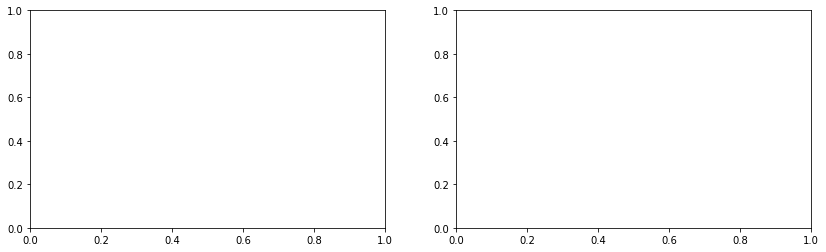

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.Abandono == 'No']["Genero"].value_counts().plot('bar', ax=ax[0]).set_title('No Abandono')
df[df.Abandono == 'Si']["Genero"].value_counts().plot('bar', ax=ax[1]).set_title('Abandono')
plt.show()

# Resumen

* Rango edad: 18 - 92
* Antiguedad: 0 - 10
* Productos: 1 - 4
* Salario: 11.580000 - 199992.480000

# Limpieza de datos

In [28]:
# Valores categoricos a codigo 1 / 0 / etc
df["Abandono"] = pd.Categorical(df.Abandono).codes
df["Genero"] = pd.Categorical(df.Genero).codes
df["Pais"] = pd.Categorical(df.Pais).codes
df["MiembroActivo"] = pd.Categorical(df.MiembroActivo).codes
df["VelocidadServicio"] = pd.Categorical(df.VelocidadServicio).codes
df["PoseeTarjetaCredito"] = pd.Categorical(df.PoseeTarjetaCredito).codes
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9000 non-null   int64  
 1   Nombre                9000 non-null   object 
 2   Email                 9000 non-null   object 
 3   Pais                  9000 non-null   int8   
 4   Genero                9000 non-null   int8   
 5   Edad                  9000 non-null   int64  
 6   Antigüedad            9000 non-null   int64  
 7   FacturacionTotal      9000 non-null   float64
 8   PuntuacionCrediticia  9000 non-null   int64  
 9   CantidadProductos     9000 non-null   int64  
 10  PoseeTarjetaCredito   9000 non-null   int8   
 11  MiembroActivo         9000 non-null   int8   
 12  SalarioEstimado       9000 non-null   float64
 13  VelocidadServicio     9000 non-null   int8   
 14  Abandono              9000 non-null   int8   
dtypes: float64(2), int64(

# Modelo de ML

In [29]:
data = df.loc[:, df.columns != 'Abandono']
data = data.loc[:, data.columns != 'Nombre']
data = data.loc[:, data.columns != 'Email']
target = df["Abandono"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, random_state=0)

array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='Pais', ylabel='id'>,
        <AxesSubplot:xlabel='Genero', ylabel='id'>,
        <AxesSubplot:xlabel='Edad', ylabel='id'>,
        <AxesSubplot:xlabel='Antigüedad', ylabel='id'>,
        <AxesSubplot:xlabel='FacturacionTotal', ylabel='id'>,
        <AxesSubplot:xlabel='PuntuacionCrediticia', ylabel='id'>,
        <AxesSubplot:xlabel='CantidadProductos', ylabel='id'>,
        <AxesSubplot:xlabel='PoseeTarjetaCredito', ylabel='id'>,
        <AxesSubplot:xlabel='MiembroActivo', ylabel='id'>,
        <AxesSubplot:xlabel='SalarioEstimado', ylabel='id'>,
        <AxesSubplot:xlabel='VelocidadServicio', ylabel='id'>],
       [<AxesSubplot:xlabel='id', ylabel='Pais'>,
        <AxesSubplot:xlabel='Pais', ylabel='Pais'>,
        <AxesSubplot:xlabel='Genero', ylabel='Pais'>,
        <AxesSubplot:xlabel='Edad', ylabel='Pais'>,
        <AxesSubplot:xlabel='Antigüedad', ylabel='Pais'>,
        <AxesSubplot:xlabel='Facturaci

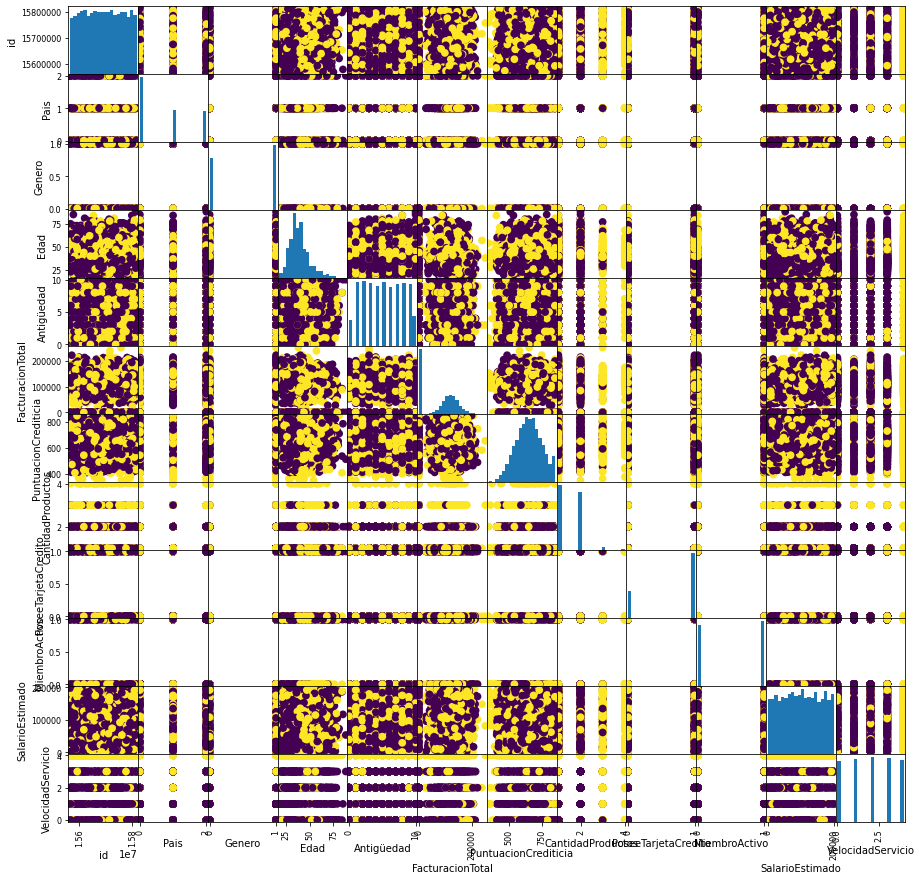

In [32]:
pd.plotting.scatter_matrix(X_train, c=Y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=8)

## Pruebas con cada Modelo

In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Regresión Logística

In [34]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, Y_train)
LR.predict(X_test)
print('Train Score:', round(LR.score(X_train,Y_train), 4))
print('Test Score:', round(LR.score(X_test,Y_test), 4))
y_pred = LR.predict(X_test)
r2score = r2_score(Y_test,y_pred)
print("R2 Score:", r2score)

Train Score: 0.64
Test Score: 0.6369
R2 Score: -0.57013258897418


#### Análisis resultados
Como podemos visualizar, para la regresión logística el train y el test score no son muy altos, por lo que no sería un buen modelo a utilizar para hacer predicciones. De todas formas podemos notar que existe una generalización ya que la diferencia entre el score de entrenamiento es muy poca con el de test, por lo cual no existe overfitting ni underfitting. 

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

print('Train Score:', rf_model.score(X_train,Y_train))
print('Test Score:', rf_model.score(X_test,Y_test))
y_pred = rf_model.predict(X_test)
r2score = r2_score(Y_test,y_pred)
print("R2 Score:", r2score)

Train Score: 1.0
Test Score: 0.8924444444444445
R2 Score: 0.5349178867420421


#### Análisis resultados
Como podemos visualizar, para random forest hay una gran diferencia entre el train y el test score. Utilizado con estos parámetros, existe overfitting, lo cual es esperado para este tipo de modelo que tiende a ese comportamiento. A continuación ajustaremos los parámetros n_estimators.

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=5)
rf_model.fit(X_train, Y_train)

print('Train Score:', rf_model.score(X_train,Y_train))
print('Test Score:', rf_model.score(X_test,Y_test))
y_pred = rf_model.predict(X_test)
r2score = r2_score(Y_test,y_pred)
print("R2 Score:", r2score)

Train Score: 0.9853333333333333
Test Score: 0.8711111111111111
R2 Score: 0.4426701948561662


#### Análisis resultados
Se sigue teniendo overfitting pero un poco menor.

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier(n_neighbors=3)
kn_model.fit(X_train, Y_train)

print('Train Score:', kn_model.score(X_train,Y_train))
print('Test Score:', kn_model.score(X_test,Y_test))
y_pred = kn_model.predict(X_test)
r2score = r2_score(Y_test,y_pred)
print("R2 Score:", r2score)

Train Score: 0.7736296296296297
Test Score: 0.5644444444444444
R2 Score: -0.8833903760033002


#### Análisis resultados
En este caso tenemos que el test score es bastante bajo, tal vez no sea el modelo que se ajuste más a este problema. De todas formas a continuación estudiaremos el comportamiento del parámetro n_neighbours y encontraremos el K más óptimo:

Nuestro K más optimo es: 45


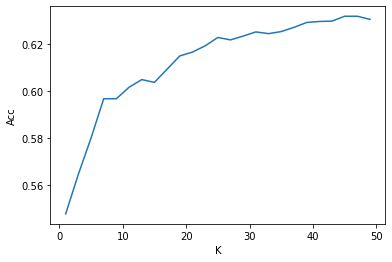

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score

k_values = [i for i in range(1, 50, 2)]

k_acc_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    cv_scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    k_acc_scores.append(cv_scores.mean())
    
optimal_k = k_values[k_acc_scores.index(max(k_acc_scores))]
    
print("Nuestro K más optimo es: {}".format(optimal_k))

plt.plot(k_values, k_acc_scores)
plt.xlabel("K")
plt.ylabel("Acc")
plt.show()

#### Análisis resultados
Como podemos ver, hemos encontrado un K óptimo de 45, vamos a correrlo nuevamente con el modelo KNN con n_neighbors 45 para ver el resultado:

In [39]:
kn_model = KNeighborsClassifier(n_neighbors=45)
kn_model.fit(X_train, Y_train)

print('Train Score:', kn_model.score(X_train,Y_train))
print('Test Score:', kn_model.score(X_test,Y_test))
y_pred = kn_model.predict(X_test)
r2score = r2_score(Y_test,y_pred)
print("R2 Score:", r2score)

Train Score: 0.6444444444444445
Test Score: 0.6284444444444445
R2 Score: -0.6066473003456725


#### Análisis resultados
Tenemos una buena generalización con n_neighbours=45 como nos arrojó el estudio del parámetro.

# Support Vector Machine

In [40]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, Y_train)

print('Train Score:', svm_model.score(X_train,Y_train))
print('Test Score:', svm_model.score(X_test,Y_test))
y_pred = svm_model.predict(X_test)
r2score = r2_score(Y_test,y_pred)
print("R2 Score:", r2score)

Train Score: 0.64
Test Score: 0.6368888888888888
R2 Score: -0.57013258897418


#### Análisis resultados
Tenemos un resultado bastante similar al de Regresión Logística y KNN.

### Conclusión
De los 4 modelos probados, podemos concluir que el que mejor se adapta a la problemática parecería ser el random forest. De todas formas se podrían utilizar variantes (como por ejemplo: arbol de decision aumentado por gradiente) como para ver cual se ajusta mejor.